In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [2]:
df = pd.read_csv('통신고객이탈.csv')
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
df.drop('CUSTOMER_ID', axis = 1, inplace = True)
df.isnull().sum()

CHURN                 0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
df_y = df['CHURN']
df_x = pd.get_dummies(df.drop('CHURN', axis = 1, inplace = False))
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 777)
print(f'train x size: {df_train_x.shape}\ntrain y size: {df_train_y.shape}\ntest x size: {df_test_x.shape}\ntest y size: {df_test_y.shape}')

train x size: (651, 33)
train y size: (651,)
test x size: (279, 33)
test y size: (279,)


In [5]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']
train_accuracy = list()
test_accuracy = list()
model_f1_score = list()
model_auc = list()

In [6]:
train_score = list()
test_score = list()

para_leaf = [leaf for leaf in range(1, 21)]

for leaf in para_leaf:
    dt_model = DecisionTreeClassifier(random_state = 777, min_samples_leaf = leaf)
    dt_model.fit(df_train_x, df_train_y)
    train_score.append(dt_model.score(df_train_x, df_train_y))
    test_score.append(dt_model.score(df_test_x, df_test_y))

df_score = pd.DataFrame()
df_score['leaf'] = para_leaf
df_score['train'] = train_score
df_score['test'] = test_score
df_score.round(3)

,leaf,train,test
0,1,1.000,0.878
1,2,0.974,0.871
2,3,0.963,0.867
3,4,0.951,0.875
4,5,0.951,0.885
5,6,0.932,0.875
6,7,0.932,0.871
7,8,0.923,0.864
8,9,0.922,0.882
9,10,0.922,0.882


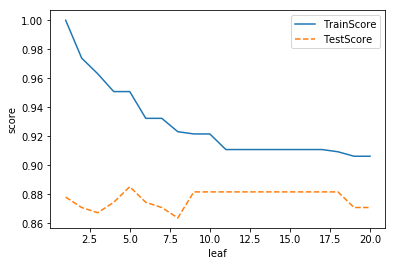

In [7]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'TestScore')
plt.xlabel('leaf')
plt.ylabel('score')
plt.legend()

# leaf == 11에서 가장 갭이 적으므로 leaf = 11

In [8]:
train_score = list()
test_score = list()

para_split = [split * 2 for split in range(1, 21)]

for split in para_split:
    dt_model = DecisionTreeClassifier(random_state = 777, min_samples_leaf = 11, min_samples_split= split)
    dt_model.fit(df_train_x, df_train_y)
    train_score.append(dt_model.score(df_train_x, df_train_y))
    test_score.append(dt_model.score(df_test_x, df_test_y))

df_score = pd.DataFrame()
df_score['split'] = para_split
df_score['train'] = train_score
df_score['test'] = test_score
df_score.round(3)

,split,train,test
0,2,0.911,0.882
1,4,0.911,0.882
2,6,0.911,0.882
3,8,0.911,0.882
4,10,0.911,0.882
5,12,0.911,0.882
6,14,0.911,0.882
7,16,0.911,0.882
8,18,0.911,0.882
9,20,0.911,0.882


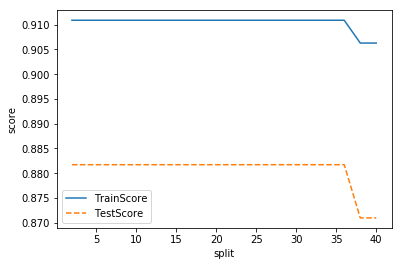

In [9]:
plt.plot(para_split, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_split, test_score, linestyle = '--', label = 'TestScore')
plt.xlabel('split')
plt.ylabel('score')
plt.legend()

# split <= 36에서 같은 수치를 유지한다. 임의로 36으로 설정한다. 과적합을 피하기 위해서 36으로 설정한 것이다.

In [12]:
train_score = list()
test_score = list()

para_depth = [depth for depth in range(1, 11)]

for depth in para_depth:
    dt_model = DecisionTreeClassifier(random_state = 777, min_samples_leaf = 11, min_samples_split= 36, max_depth=depth)
    dt_model.fit(df_train_x, df_train_y)
    train_score.append(dt_model.score(df_train_x, df_train_y))
    test_score.append(dt_model.score(df_test_x, df_test_y))

df_score = pd.DataFrame()
df_score['depth'] = para_depth
df_score['train'] = train_score
df_score['test'] = test_score
df_score.round(3)

,depth,train,test
0,1,0.851,0.832
1,2,0.883,0.849
2,3,0.900,0.878
3,4,0.900,0.878
4,5,0.905,0.889
5,6,0.905,0.889
6,7,0.911,0.882
7,8,0.911,0.882
8,9,0.911,0.882
9,10,0.911,0.882


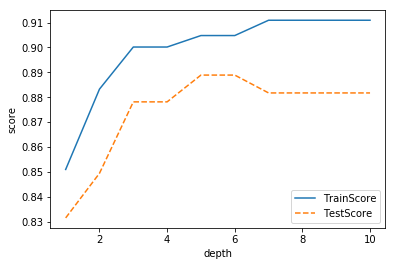

In [13]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_depth, test_score, linestyle = '--', label = 'TestScore')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend()

# depth == 3에서 변곡점이 왔으므로 3으로 지정한다. 마침 갭도 적은 편이다.

In [14]:
train_score = list()
test_score = list()

para_lr = [lr * 0.1 for lr in range(1, 10)]
for lr in para_lr:
    dt_fin = GradientBoostingClassifier(random_state = 777, min_samples_leaf = 11, min_samples_split= 36, max_depth=3, learning_rate=lr)
    dt_fin.fit(df_train_x, df_train_y)
    train_score.append(dt_fin.score(df_train_x, df_train_y))
    test_score.append(dt_fin.score(df_test_x, df_test_y))

_tmp = pd.DataFrame()
_tmp['lr'] = para_lr
_tmp['train'] = train_score
_tmp['test'] = test_score
_tmp.round(3)


,lr,train,test
0,0.1,0.966,0.907
1,0.2,0.992,0.892
2,0.3,1.000,0.892
3,0.4,1.000,0.885
4,0.5,1.000,0.878
5,0.6,1.000,0.878
6,0.7,1.000,0.867
7,0.8,1.000,0.882
8,0.9,1.000,0.882


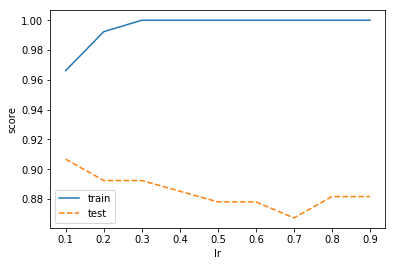

In [15]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'train')
plt.plot(para_lr, test_score, linestyle = '--', label = 'test')
plt.xlabel('lr')
plt.ylabel('score')
plt.legend()

# train과 test 데이터 사이의 갭이 가장 작고, 동시에 test의 스코어가 가장 높으며, train의 과적합이 이루어지지 않은 lr == 0.1을 선택한다.

In [19]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']
train_accuracy = list()
test_accuracy = list()
model_f1_score = list()
model_auc = list()
LEAF = 11
SPLIT = 36
DEPTH = 3
LR = 0.1

In [25]:
dt_model = DecisionTreeClassifier(max_depth=DEPTH, min_samples_leaf=LEAF, min_samples_split=SPLIT)
dt_model.fit(df_train_x, df_train_y)
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

np.where(df_test_y[''])

fpr, tpr, thresholds = roc_curve(df_test_y_dummy, y_pred_dummy)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

ValueError: multilabel-indicator format is not supported